# Correlations Using Pandas and SciPy

**Correlation** is a measure of how strongly two variables are related to one another. The most common measure of correlation is the **Pearson correlation coefficient**, which, for two sets of paired data $x_i$ and $y_i$ is defined as

$$r = \frac{1}{n - 1}\sum_{i = 1}^n \left(\frac{x_i - \bar{x}}{s_x}\right)\left(\frac{y_i - \bar{y}}{s_y}\right)$$

$r$ is a number between 1 and -1, with $r > 0$ indicating a positive relationship ($x$ and $y$ increase together) and $r < 0$ a negative relationship ($x$ increases as $y$ decreases). When $|r| = 1$, there is a perfect *linear* relationship, while if $r = 0$ there is no *linear* relationship ($r$ may fail to capture non-linear relationships). In practice, $r$ is never exactly 0, so $r$ with small magnitude are synonymous with "no correlation". $|r| = 1$ does occur, usually when two variables effectively describe the same phenomena (for example, height in meters vs. height in centimeters, or grocery bill and sales tax).

## Loading the Boston House Price Dataset

The Boston housing prices dataset is included with **sklearn** as a "toy" dataset (one used to experiment with statistical and machine learning methods). It includes the results of a survey that prices houses from various areas of Boston, and includes variables such as the crime rate of an area, the age of the home owners, and other variables. While many applications focus on predicting the price of housing based on these variables, I'm only interested in the correlation between these variables (perhaps this will suggest a model later).

Below I load in the dataset and create a Pandas `DataFrame` from it.

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
boston = load_boston()

In [3]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
boston.data

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          1.53000000e+01,   3.96900000e+02,   4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.96900000e+02,   9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.92830000e+02,   4.03000000e+00],
       ..., 
       [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   5.64000000e+00],
       [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.93450000e+02,   6.48000000e+00],
       [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   7.88000000e+00]])

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

In [6]:
boston.target

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
        18.9,  15. ,  18.9,  21.7,  20.4,  18.2,  19.9,  23.1,  17.5,
        20.2,  18.2,  13.6,  19.6,  15.2,  14.5,  15.6,  13.9,  16.6,
        14.8,  18.4,  21. ,  12.7,  14.5,  13.2,  13.1,  13.5,  18.9,
        20. ,  21. ,  24.7,  30.8,  34.9,  26.6,  25.3,  24.7,  21.2,
        19.3,  20. ,  16.6,  14.4,  19.4,  19.7,  20.5,  25. ,  23.4,
        18.9,  35.4,  24.7,  31.6,  23.3,  19.6,  18.7,  16. ,  22.2,
        25. ,  33. ,  23.5,  19.4,  22. ,  17.4,  20.9,  24.2,  21.7,
        22.8,  23.4,  24.1,  21.4,  20. ,  20.8,  21.2,  20.3,  28. ,
        23.9,  24.8,  22.9,  23.9,  26.6,  22.5,  22.2,  23.6,  28.7,
        22.6,  22. ,  22.9,  25. ,  20.6,  28.4,  21.4,  38.7,  43.8,
        33.2,  27.5,  26.5,  18.6,  19.3,  20.1,  19.5,  19.5,  20.4,
        19.8,  19.4,  21.7,  22.8,  18.8,  18.7,  18.5,  18.3,  21.2,
        19.2,  20.4,  19.3,  22. ,  20.3,  20.5,  17.3,  18.8,  21.4,
        15.7,  16.2,

In [7]:
temp = DataFrame(boston.data, columns=pd.Index(boston.feature_names))
boston = temp.join(DataFrame(boston.target, columns=["PRICE"]))
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


## Correlation Between Two Variables

We could use NumPy's `corrcoef()` function if we wanted the correlation between two variable, say, the local area crime rate (CRIM) and the price of a home (PRICE).

In [8]:
from numpy import corrcoef

In [9]:
boston.CRIM.as_matrix()    # As a NumPy array

array([  6.32000000e-03,   2.73100000e-02,   2.72900000e-02,
         3.23700000e-02,   6.90500000e-02,   2.98500000e-02,
         8.82900000e-02,   1.44550000e-01,   2.11240000e-01,
         1.70040000e-01,   2.24890000e-01,   1.17470000e-01,
         9.37800000e-02,   6.29760000e-01,   6.37960000e-01,
         6.27390000e-01,   1.05393000e+00,   7.84200000e-01,
         8.02710000e-01,   7.25800000e-01,   1.25179000e+00,
         8.52040000e-01,   1.23247000e+00,   9.88430000e-01,
         7.50260000e-01,   8.40540000e-01,   6.71910000e-01,
         9.55770000e-01,   7.72990000e-01,   1.00245000e+00,
         1.13081000e+00,   1.35472000e+00,   1.38799000e+00,
         1.15172000e+00,   1.61282000e+00,   6.41700000e-02,
         9.74400000e-02,   8.01400000e-02,   1.75050000e-01,
         2.76300000e-02,   3.35900000e-02,   1.27440000e-01,
         1.41500000e-01,   1.59360000e-01,   1.22690000e-01,
         1.71420000e-01,   1.88360000e-01,   2.29270000e-01,
         2.53870000e-01,

In [10]:
corrcoef(boston.CRIM.as_matrix(), boston.PRICE.as_matrix())

array([[ 1.        , -0.38583169],
       [-0.38583169,  1.        ]])

The numbers in the off-diagonal entries correspond to the correlation between the two variables. In this case, there is a negative relationship, which makes sense (more crime is associated with lower prices), but the correlation is only moderate.

## Computing a Correlation Matrix

When we have several variables we may want to see what correlations there are among them. We can compute a **correlation matrix** that includes the correlations between the different variables in the dataset.

When loaded into a Pandas `DataFrame`, we can use the `corr()` method to get the correlation matrix.

In [11]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


While this has a lot of data it's not easy to read. Let's visualize the correlations with a heatmap.

In [12]:
import seaborn as sns    # Allows for easy plotting of heatmaps

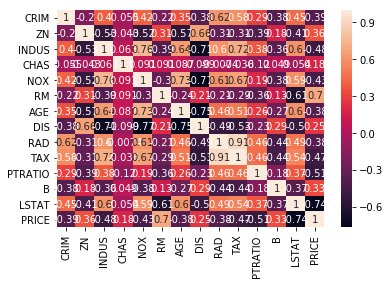

In [13]:
sns.heatmap(boston.corr(), annot=True)

The heatmap reveal some interesting patterns. We can see

* A strong positive relationship between home prices and the average number of rooms for homes in that area (RM)
* A strong negative relationship between home prices and the percentage of lower status of the population (LSTAT)
* A strong positive relationship between accessibility to radial highways (RAD) and property taxes (TAX)
* A negative relationship between nitric oxides concentration (NOX) and distance to major employment areas in Boston
* No relationshipp between the Charles River variable (CHAS) and any other variable

## Statistical Test for Correlation

Suppose we want extra assurance that two variables are correlated. We could perform a statistical test that tests

$$H_0: \rho = 0$$
$$H_A: \rho \neq 0$$

(Where $\rho$ is the population, or "true", correlation.) This test is provided for in SciPy.

In [14]:
from scipy.stats import pearsonr

In [15]:
# Test to see if crime rate and house prices are correlated
pearsonr(boston.CRIM, boston.PRICE)

(-0.38583168988399053, 2.0835501108141935e-19)

The first number in the returned tuple is the computed sample correlation coefficient $r$, and the second number is the p-value of the test. In this case, the evidence that there is *any* non-zero correlation is strong. That said, just because we can conclude that the correlation is not zero does not mean that the correlation is meaningful.